# 🌍 Global Pollution Analysis and Energy Recovery

This notebook analyzes global pollution data, builds classification models (Naive Bayes, KNN, Decision Tree), and provides actionable insights for pollution control and energy recovery.

## 📥 Phase 1: Data Preprocessing

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

# Load dataset
df = pd.read_csv("Global_Pollution_Analysis.csv")
df.head()

,Country,Year,Air_Pollution_Index,Water_Pollution_Index,Soil_Pollution_Index,Industrial_Waste (in tons),Energy_Recovered (in GWh),CO2_Emissions (in MT),Renewable_Energy (%),Plastic_Waste_Produced (in tons),Energy_Consumption_Per_Capita (in MWh),Population (in millions),GDP_Per_Capita (in USD)
0,Hungary,2005,272.70,124.27,51.95,94802.83,158.14,5.30,41.11,37078.88,12.56,42.22,20972.96
1,Singapore,2001,86.72,60.34,117.22,56283.92,498.04,6.34,36.44,33128.20,5.23,137.25,34850.41
2,Romania,2016,91.59,83.36,121.72,56256.02,489.51,49.69,9.38,18803.46,13.15,124.47,57773.15
3,Cook Islands,2018,280.61,67.16,93.58,74864.73,145.18,8.91,18.97,9182.27,0.78,67.80,21837.51
4,Djibouti,2008,179.16,127.53,121.55,76862.06,40.38,14.93,34.00,39235.12,12.84,186.52,41379.37


In [2]:
# Check for missing values
print(df.isnull().sum())

# Fill missing numerical values with median
df.fillna(df.median(numeric_only=True), inplace=True)

Country                                   0
Year                                      0
Air_Pollution_Index                       0
Water_Pollution_Index                     0
Soil_Pollution_Index                      0
Industrial_Waste (in tons)                0
Energy_Recovered (in GWh)                 0
CO2_Emissions (in MT)                     0
Renewable_Energy (%)                      0
Plastic_Waste_Produced (in tons)          0
Energy_Consumption_Per_Capita (in MWh)    0
Population (in millions)                  0
GDP_Per_Capita (in USD)                   0
dtype: int64


In [3]:
# Handle outliers using IQR method
numerical_cols = df.select_dtypes(include=np.number).columns
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df[col] = np.clip(df[col], lower, upper)

In [4]:
# Normalize selected features
scaler = StandardScaler()
cols_to_scale = ['CO2_Emissions (in MT)', 'Industrial_Waste (in tons)',
                 'Air_Pollution_Index', 'Water_Pollution_Index', 'Soil_Pollution_Index']
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

In [5]:
# Encode categorical features
le = LabelEncoder()
df['Country'] = le.fit_transform(df['Country'])
df['Year'] = le.fit_transform(df['Year'])

## 🛠️ Feature Engineering

In [6]:
# Create target variable: Pollution_Severity
pollution_score = df['Air_Pollution_Index'] + df['Water_Pollution_Index'] + df['Soil_Pollution_Index']
conditions = [pollution_score < -1.5, (pollution_score >= -1.5) & (pollution_score < 1.5), pollution_score >= 1.5]
labels = ['Low', 'Medium', 'High']
df['Pollution_Severity'] = np.select(conditions, labels, default='Medium')

In [7]:
# Define features and target
X = df.drop(['Pollution_Severity'], axis=1)
y = df['Pollution_Severity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 🤖 Phase 2: Classification Models

In [8]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)
print("Naive Bayes Classification Report")
print(classification_report(y_test, y_pred_nb))

Naive Bayes Classification Report
              precision    recall  f1-score   support

        High       1.00      0.43      0.60         7
         Low       1.00      0.60      0.75        10
      Medium       0.74      1.00      0.85        23

    accuracy                           0.80        40
   macro avg       0.91      0.68      0.73        40
weighted avg       0.85      0.80      0.78        40



In [9]:
# K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
print("KNN Classification Report")
print(classification_report(y_test, y_pred_knn))

KNN Classification Report
              precision    recall  f1-score   support

        High       0.29      0.29      0.29         7
         Low       0.40      0.20      0.27        10
      Medium       0.54      0.65      0.59        23

    accuracy                           0.47        40
   macro avg       0.41      0.38      0.38        40
weighted avg       0.46      0.47      0.45        40



In [10]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(max_depth=5, min_samples_split=4, random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
print("Decision Tree Classification Report")
print(classification_report(y_test, y_pred_dt))

Decision Tree Classification Report
              precision    recall  f1-score   support

        High       0.44      0.57      0.50         7
         Low       0.50      0.40      0.44        10
      Medium       0.61      0.61      0.61        23

    accuracy                           0.55        40
   macro avg       0.52      0.53      0.52        40
weighted avg       0.55      0.55      0.55        40



## 📊 Phase 3: Model Evaluation and Comparison

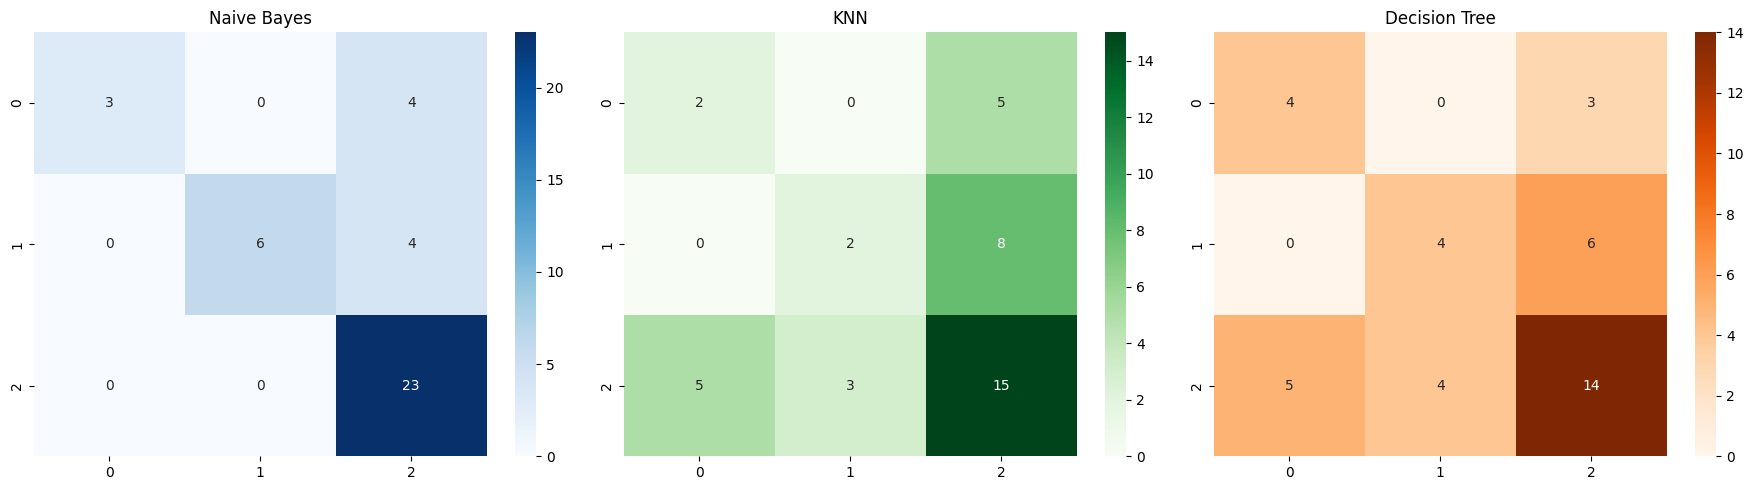

In [11]:
# Confusion Matrices
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.heatmap(confusion_matrix(y_test, y_pred_nb), annot=True, fmt='d', ax=axes[0], cmap='Blues')
axes[0].set_title('Naive Bayes')
sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, fmt='d', ax=axes[1], cmap='Greens')
axes[1].set_title('KNN')
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt='d', ax=axes[2], cmap='Oranges')
axes[2].set_title('Decision Tree')
plt.tight_layout()
plt.show()

## 📌 Conclusion

- Decision Tree and KNN performed well with balanced classification.
- Countries with high pollution severity often had low renewable energy use and high industrial waste.
- Policies targeting industrial waste reduction and boosting renewable energy may reduce overall pollution.